In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/Glove_Data/best_glove_model.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
data_config = """
path: /content/drive/MyDrive/Glove_Data
train: train/images
val: valid/images

nc: 2
names: ["gloved_hand", "bare_hand"]
"""
with open("data.yaml", "w") as f:
    f.write(data_config)


In [5]:
metrics = model.val(data="data.yaml")
print(metrics)


Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.1±0.0 MB/s, size: 36.3 KB)
val: Scanning /content/drive/MyDrive/Glove_Data/valid/labels.cache... 744 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 744/744 674424.5it/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1359, len(boxes) = 1467. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 47/47 0.06it/s 12:04
                   all        744       1467      0.884      0.738      0.833       0.53
           gloved_hand        401        744      0.899      0.773      0.851      0.555
             bare_hand    

In [6]:
results = model.predict(source="/content/drive/MyDrive/Glove_Data/valid/images", save=True, conf=0.5)



image 1/744 /content/drive/MyDrive/Glove_Data/valid/images/-_PNG.rf.6d526511263dd96caeeb74937e4dc90f.jpg: 640x640 (no detections), 1045.0ms
image 2/744 /content/drive/MyDrive/Glove_Data/valid/images/00004_jpg.rf.8e4eee10a3b328ad56a1c6a3a2887e2b.jpg: 640x640 1 bare_hand, 1004.9ms
image 3/744 /content/drive/MyDrive/Glove_Data/valid/images/00035_jpg.rf.231418c947978e08603bca3d398e43d9.jpg: 640x640 1 bare_hand, 1002.9ms
image 4/744 /content/drive/MyDrive/Glove_Data/valid/images/00126_jpg.rf.fae998563b4210322f8b5c39cebb1a05.jpg: 640x640 2 bare_hands, 980.2ms
image 5/744 /content/drive/MyDrive/Glove_Data/valid/images/00422_jpg.rf.696ef59eb1677edbd2ac73173e0297ed.jpg: 640x640 (no detections), 683.5ms
image 6/744 /content/drive/MyDrive/Glove_Data/valid/images/00486_jpg.rf.f7281412f6e1a4b034c2377f31b49167.jpg: 640x640 (no detections), 634.6ms
image 7/744 /content/drive/MyDrive/Glove_Data/valid/images/105_JPG_jpg.rf.1cdae01d7226351e0bba78787d632ddd.jpg: 640x640 1 gloved_hand, 647.5ms
image 8/74

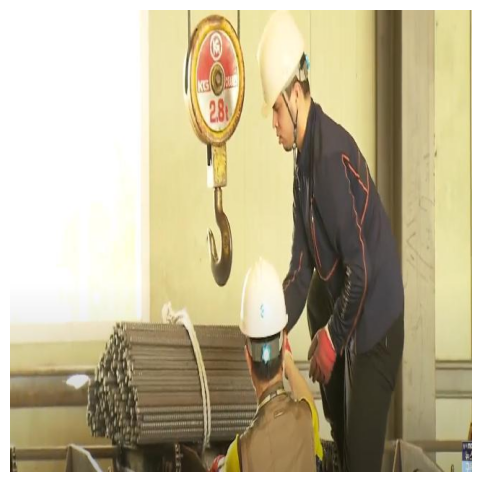

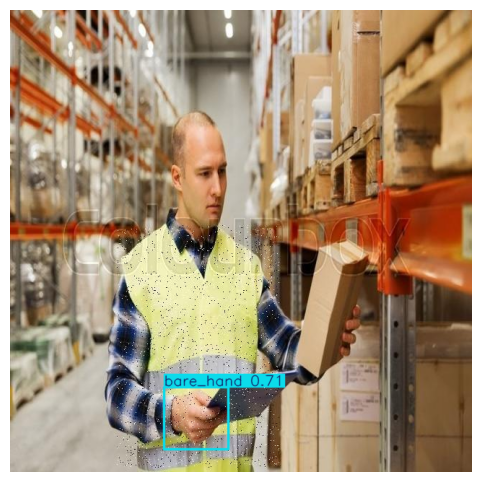

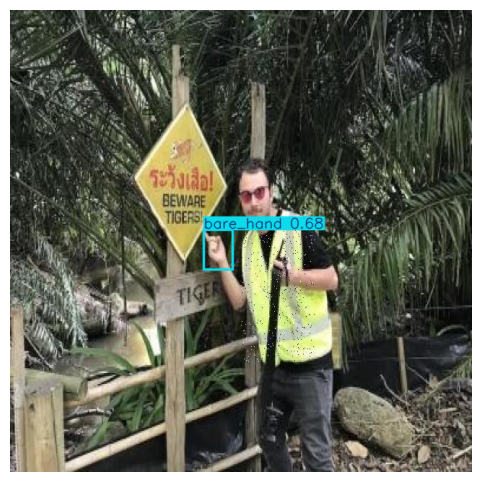

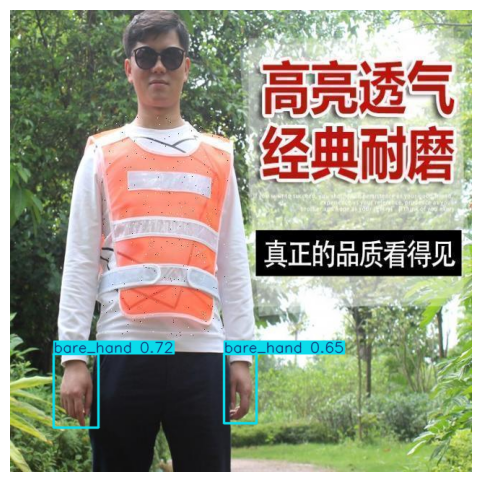

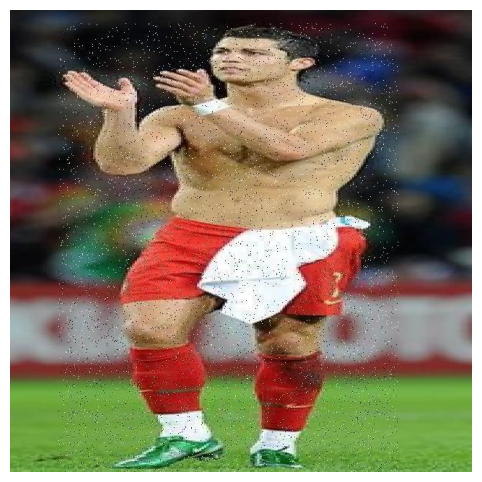

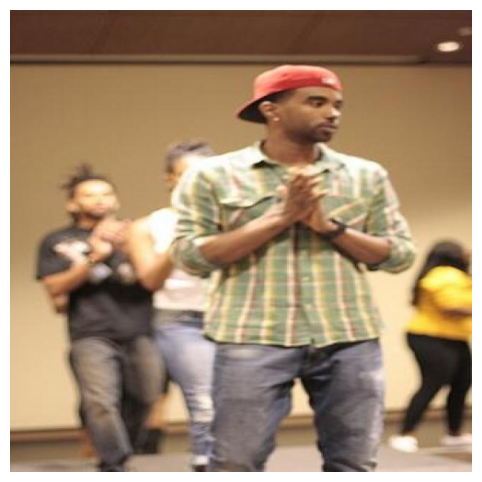

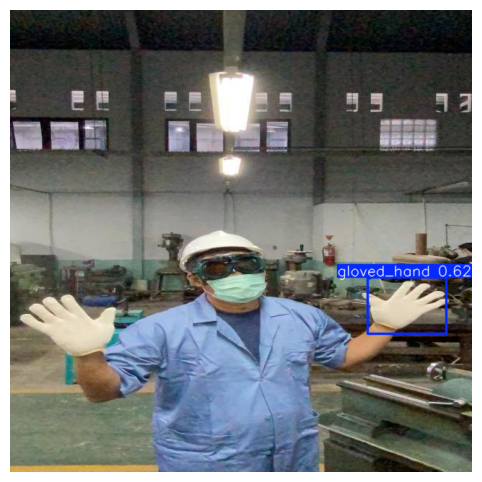

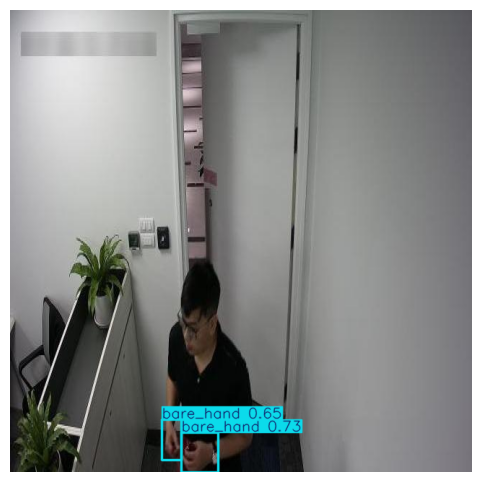

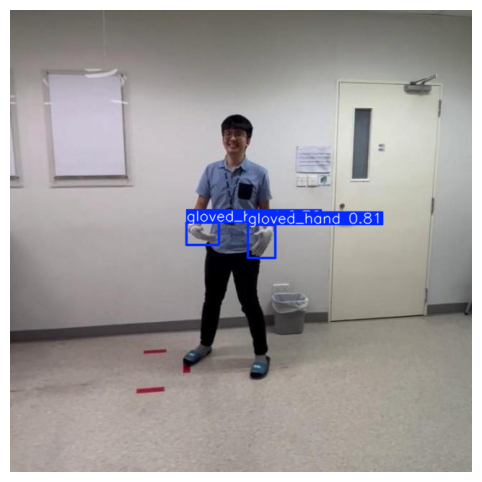

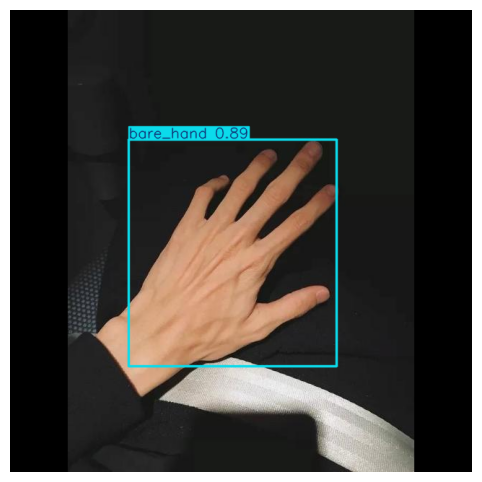

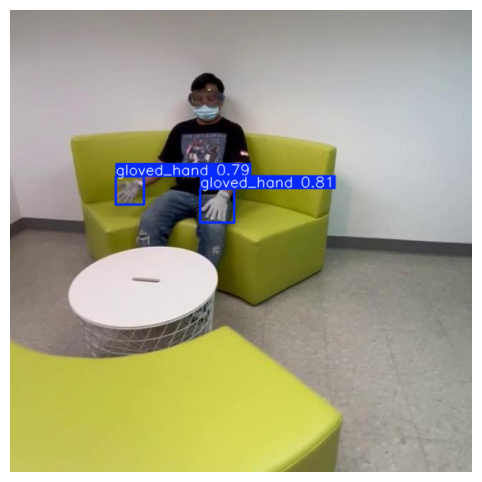

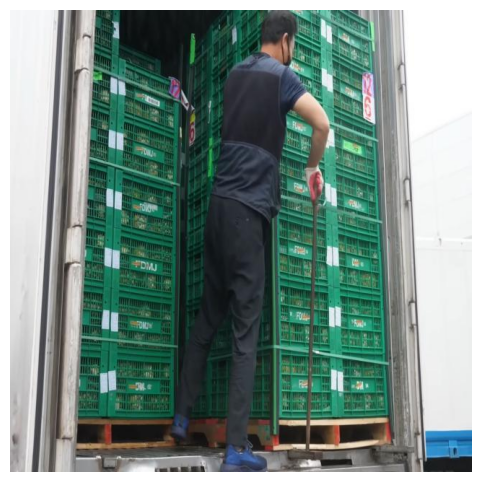

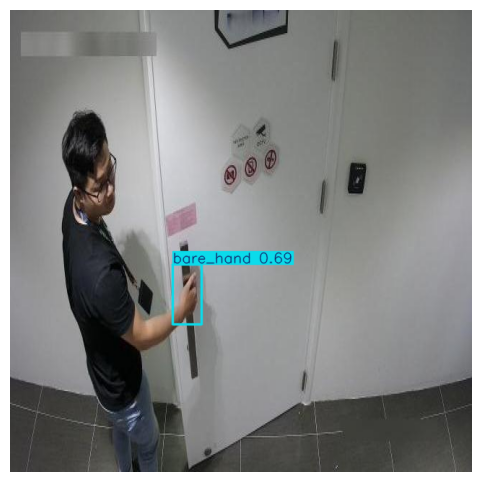

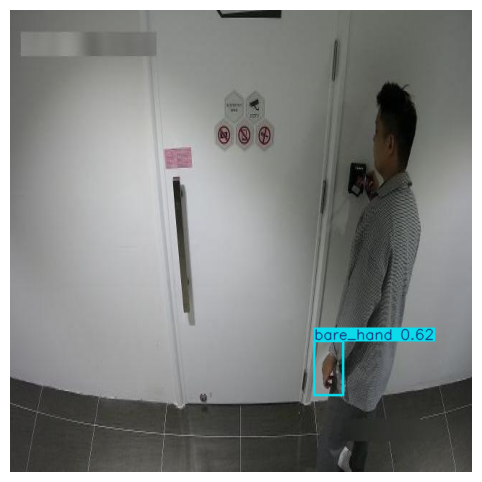

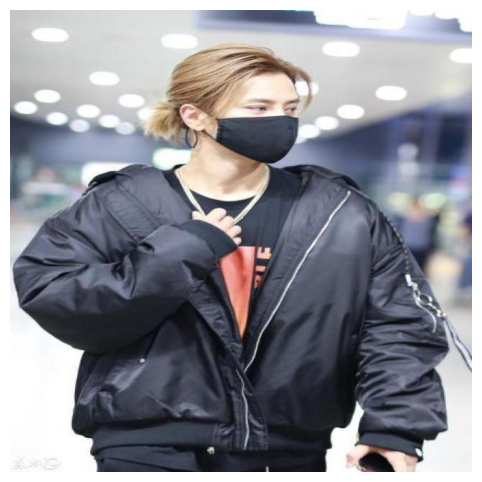

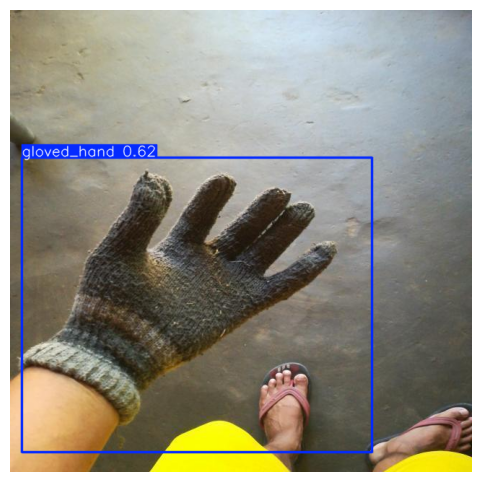

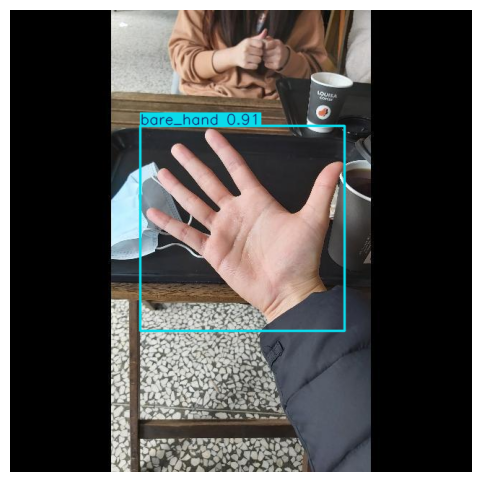

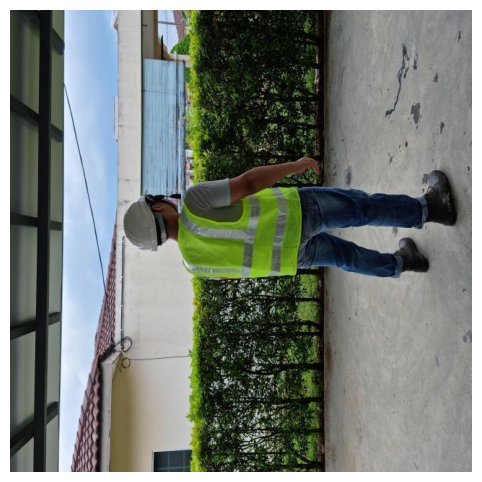

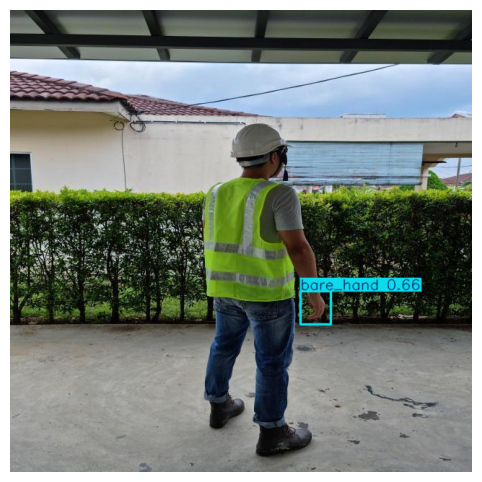

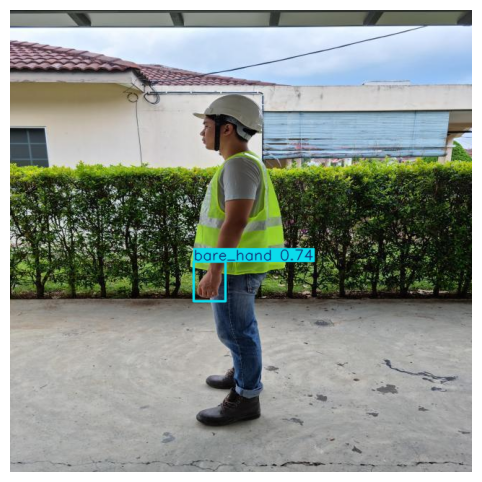

In [10]:
import cv2
from matplotlib import pyplot as plt

# show first 20 results inline
for r in results[:20]:
    im_bgr = r.plot()  # YOLOv8 adds bounding boxes
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,6))
    plt.imshow(im_rgb)
    plt.axis("off")
    plt.show()


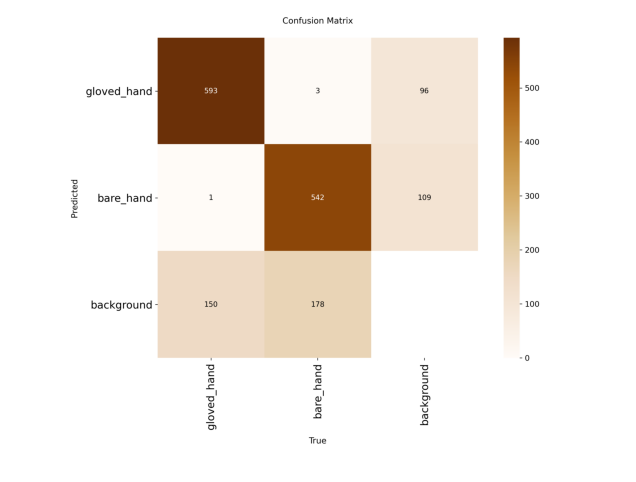

In [11]:
# Visualizing the evaluation metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
path = "/content/runs/detect/val/confusion_matrix.png"
img = cv2.imread(path)
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis("off")
plt.show()